In [2]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Values Pulse Check 2023_Overall_Raw Data.xlsx")
df = df.iloc[1:].reset_index(drop=True)

In [ ]:
print("Total countries:", df["Q23_1"].nunique())
df["Q23_1"].unique()

Total countries: 34


array(['Netherlands', 'Germany', 'Switzerland', 'United Kingdom',
       'Turkey', 'Italy', 'Belgium', 'Spain', 'Thailand', 'Denmark',
       'Greater China', 'Poland', 'Portugal', 'United States', 'Dubai',
       'Australia', 'Other', 'France', 'Austria', 'Malaysia', 'Sweden',
       'Latvia & Estonia', 'Brazil', 'Japan', 'Canada', 'Singapore',
       'Russia', 'Greece', 'Norway', 'Ireland', 'Mexico', 'No answer',
       nan, 'Finland', 'South Korea'], dtype=object)

In [ ]:
df["Q23_1"].value_counts()

Q23_1
Turkey              867
Germany             680
Mexico              187
Switzerland         181
Italy               177
United States       133
Canada              121
Brazil               88
United Kingdom       70
Poland               40
Spain                30
Denmark              27
Greater China        21
Other                20
Australia            16
Thailand             15
Dubai                14
France               14
Austria              12
Netherlands          11
No answer             8
Japan                 8
Portugal              7
Greece                6
Belgium               5
Sweden                5
Finland               4
Russia                3
Singapore             3
Latvia & Estonia      2
Ireland               2
Norway                2
Malaysia              1
South Korea           1
Name: count, dtype: int64

In [ ]:
# Columns that talk about how well a certain quality is reflected in the division
qualities_columns = ["Q8", "Q10", "Q12", "Q14", "Q16", "Q18"]
division_column = "Q23_1"
extra_columns = ["Q37", "Q25", "Q26", "Q27", "Q24_1"]
df = df[qualities_columns + [division_column] + extra_columns]

null_values = df.isnull().sum()

print("Shape: ", df.shape)
print("Null values in each column:\n", null_values)

# Define a mapping from categorical responses to numerical values
response_mapping = {
    "Very poor": 1,
    "Poor": 2,
    "Satisfactory": 3,
    "Well": 4,
    "Very well": 5,
    "No answer": None,
}

Shape:  (3504, 12)
Null values in each column:
 Q8       436
Q10      439
Q12      446
Q14      453
Q16      452
Q18      461
Q23_1    723
Q37      807
Q25      753
Q26      741
Q27      750
Q24_1    723
dtype: int64


In [6]:
df.dropna(inplace=True)
null_values = df.isnull().sum()

In [ ]:
df.columns = [
    "TRUST",
    "ENTREPRENEURIAL SPIRIT",
    "YOUTHFUL SPIRIT",
    "SIMPLICITY & QUALITY",
    "TEAM MENTALITY",
    "PERSONAL OWNERSHIP",
    "Country",
    "Occupational Group",
    "Leadership Position",
    "Tenure",
    "Age",
    "Division"
]
df.head()

,TRUST,ENTREPRENEURIAL SPIRIT,YOUTHFUL SPIRIT,SIMPLICITY & QUALITY,TEAM MENTALITY,PERSONAL OWNERSHIP,Country,Occupational Group,Leadership Position,Tenure,Age,Division
0,Satisfactory,Satisfactory,Well,Satisfactory,Well,Poor,Netherlands,White Collar,Yes,1-3 years,43 - 50,Finance
1,Very well,Well,Very well,Well,Satisfactory,Well,Germany,White Collar,No,> 10 years,35 - 42,Strategy
2,No answer,Very poor,Very poor,Very poor,Very poor,Very poor,Germany,White Collar,No,5-10 years,27 - 34,IT
3,Poor,Well,Poor,Satisfactory,Very poor,Poor,Germany,White Collar,No,3-5 years,27 - 34,Logistics
4,Very well,Very well,Very well,Well,Very well,Well,Switzerland,No answer,No,1-3 years,27 - 34,Procurement


In [8]:
country_counts = df["Country"].value_counts()
countries_to_keep = country_counts[country_counts > 30].index
df = df[df["Country"].isin(countries_to_keep)]
df.shape

(2426, 12)

In [9]:
# Convert categorical responses to numerical values for quality columns
qualities_columns = [
    "TRUST",
    "ENTREPRENEURIAL SPIRIT",
    "YOUTHFUL SPIRIT",
    "SIMPLICITY & QUALITY",
    "TEAM MENTALITY",
    "PERSONAL OWNERSHIP",
]

for quality in qualities_columns:

    df[quality] = df[quality].map(response_mapping)
df.head()

,TRUST,ENTREPRENEURIAL SPIRIT,YOUTHFUL SPIRIT,SIMPLICITY & QUALITY,TEAM MENTALITY,PERSONAL OWNERSHIP,Country,Occupational Group,Leadership Position,Tenure,Age,Division
1,5.0,4.0,5.0,4.0,3.0,4.0,Germany,White Collar,No,> 10 years,35 - 42,Strategy
2,NaN,1.0,1.0,1.0,1.0,1.0,Germany,White Collar,No,5-10 years,27 - 34,IT
3,2.0,4.0,2.0,3.0,1.0,2.0,Germany,White Collar,No,3-5 years,27 - 34,Logistics
4,5.0,5.0,5.0,4.0,5.0,4.0,Switzerland,No answer,No,1-3 years,27 - 34,Procurement
5,4.0,2.0,3.0,3.0,4.0,4.0,Germany,Blue Collar,Yes,> 10 years,35 - 42,IT


In [ ]:
df.dropna(inplace=True)
null_values = df.isnull().sum()

print("Shape: ", df.shape)
print("Null values in each column:\n", null_values)

Shape:  (2347, 12)
Null values in each column:
 TRUST                     0
ENTREPRENEURIAL SPIRIT    0
YOUTHFUL SPIRIT           0
SIMPLICITY & QUALITY      0
TEAM MENTALITY            0
PERSONAL OWNERSHIP        0
Country                   0
Occupational Group        0
Leadership Position       0
Tenure                    0
Age                       0
Division                  0
dtype: int64


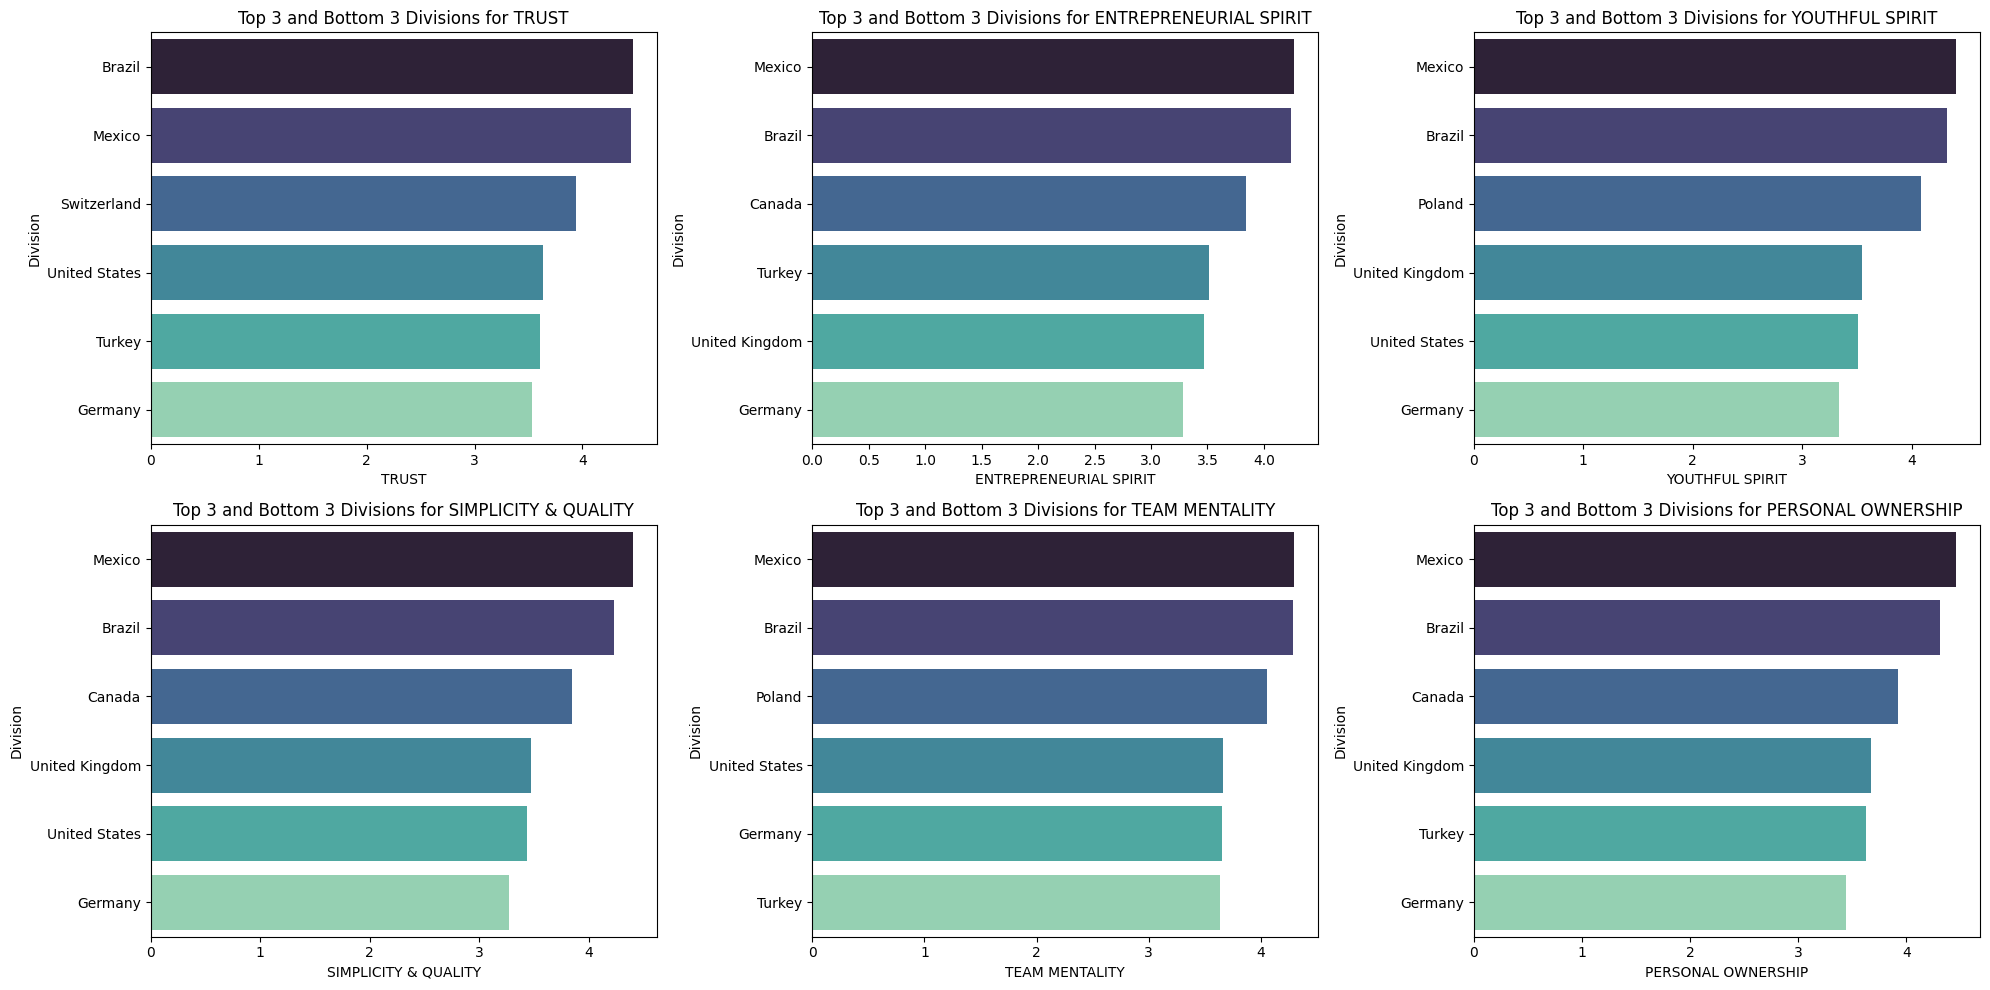

In [11]:
country_data = df[qualities_columns + ['Country']]
country_data = country_data.groupby('Country').mean().reset_index()

# Function to get top 5 and bottom 6 for each quality (column)
def get_top_bottom(df, column):
    sorted_df = df[["Country", column]].sort_values(by=column, ascending=False)
    top_5 = sorted_df.head(3)
    bottom_6 = sorted_df.tail(3)
    combined_df = pd.concat([top_5, bottom_6])
    return combined_df


# Create subplots (2 rows, 3 columns)
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Loop through each column and assign each plot to a subplot
for i, col in enumerate(
    qualities_columns
):  # Loop over qualities columns list
    # Get top 5 and bottom 6 for the current column
    top_bottom_df = get_top_bottom(country_data, col)

    # Plot in the corresponding subplot
    sns.barplot(
        x=col, y="Country", data=top_bottom_df, palette="mako", ax=ax[i // 3, i % 3]
    )
    ax[i // 3, i % 3].set_title(f"Top 3 and Bottom 3 Divisions for {col}")
    ax[i // 3, i % 3].set_xlabel(col)
    ax[i // 3, i % 3].set_ylabel("Division")

# Adjust layout for readability
plt.tight_layout()
plt.show()

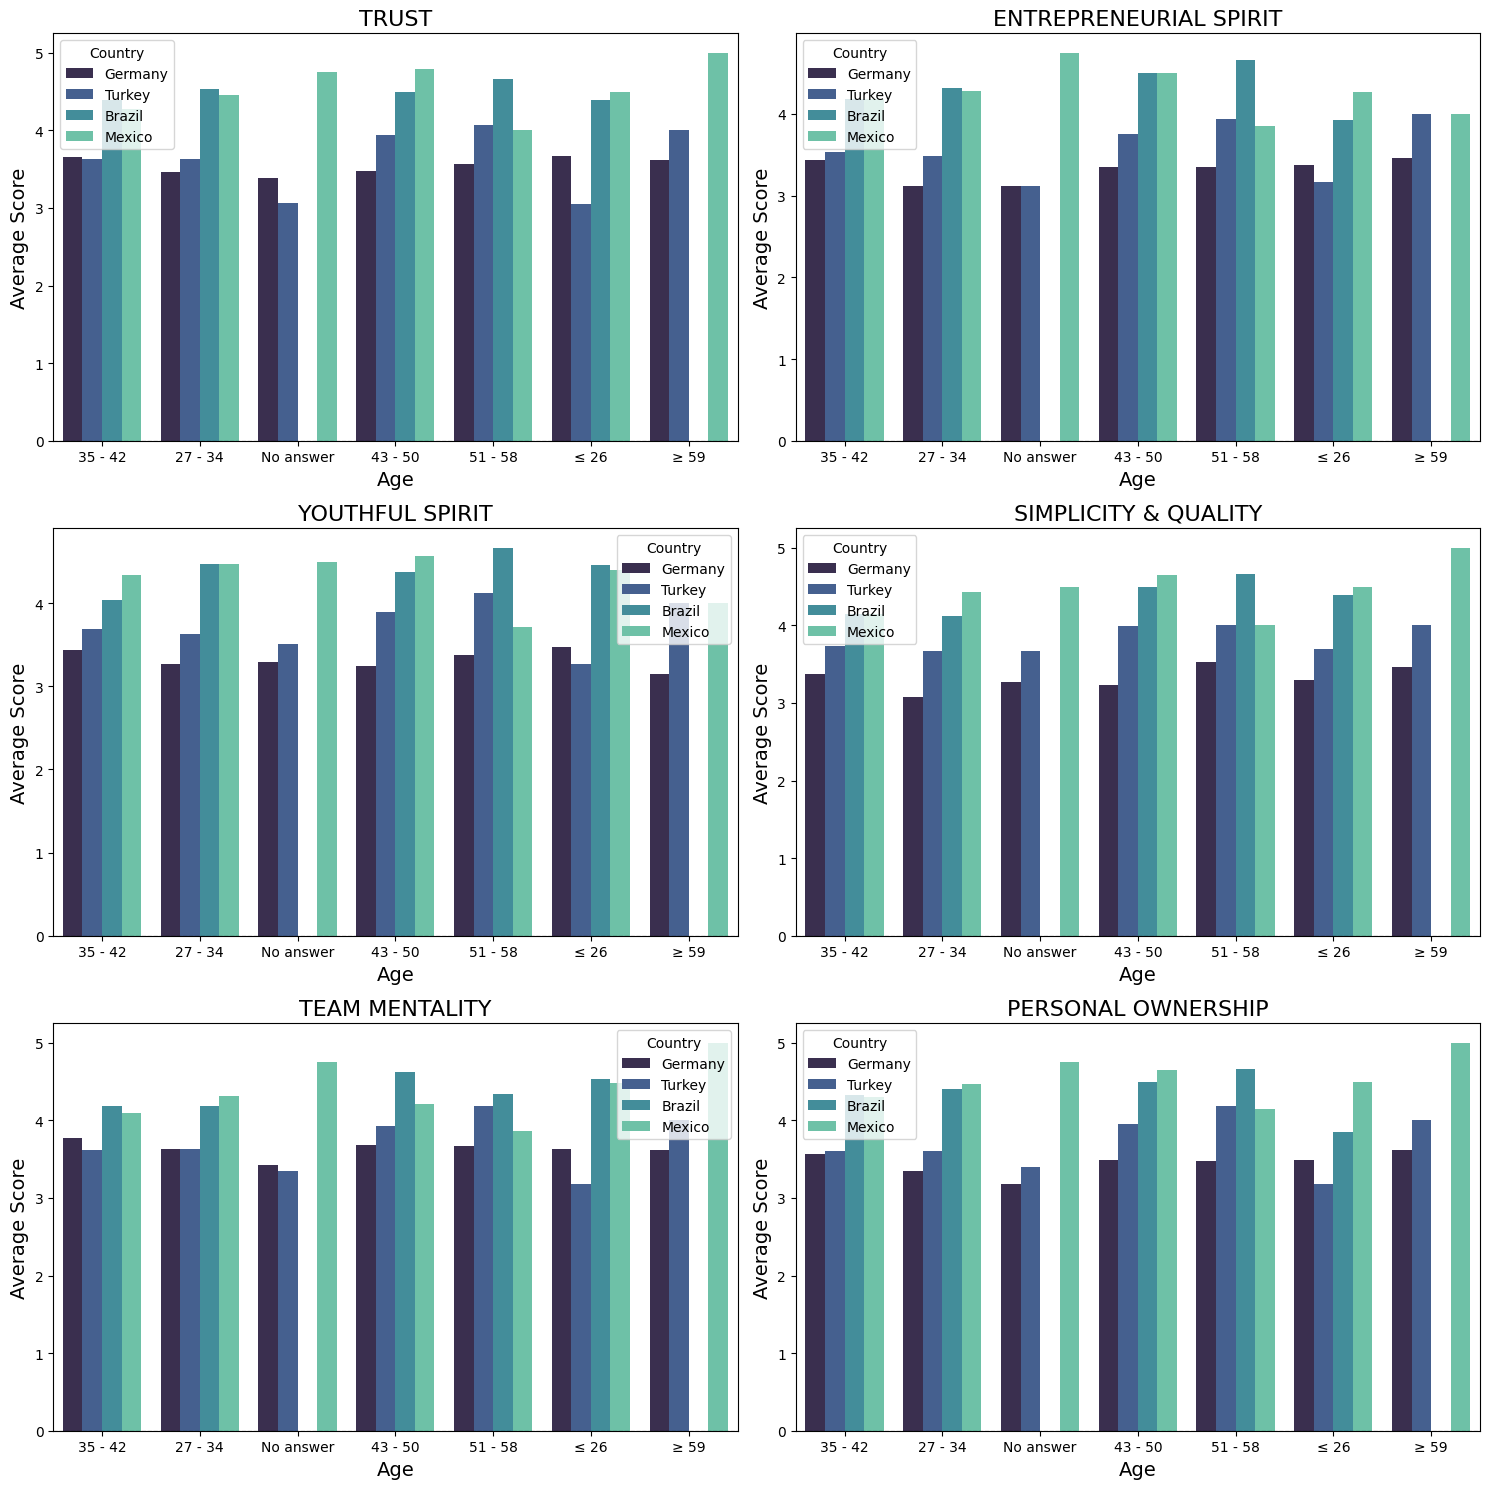

In [12]:
import seaborn as sns
extracted_data = df[df['Country'].isin(['Germany', 'Turkey', 'Brazil', 'Mexico'])]

def get_analysis(column):

    n_qualities = len(qualities_columns)
    n_rows = (n_qualities + 1) // 2 

    fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5))
    axes = axes.flatten()  

    for ax, quality in zip(axes, qualities_columns):
        sns.barplot(x=f'{column}', y=quality, hue='Country', data=extracted_data, ax=ax, palette='mako', ci=None, legend=True)
        ax.set_title(f'{quality}', fontsize=16)
        ax.set_ylabel('Average Score', fontsize=14)
        ax.set_xlabel(f'{column}', fontsize=14)
        ax.axhline(y=0, color='black', linewidth=0.8, linestyle='--')
    plt.tight_layout()
    plt.show()

get_analysis('Age')

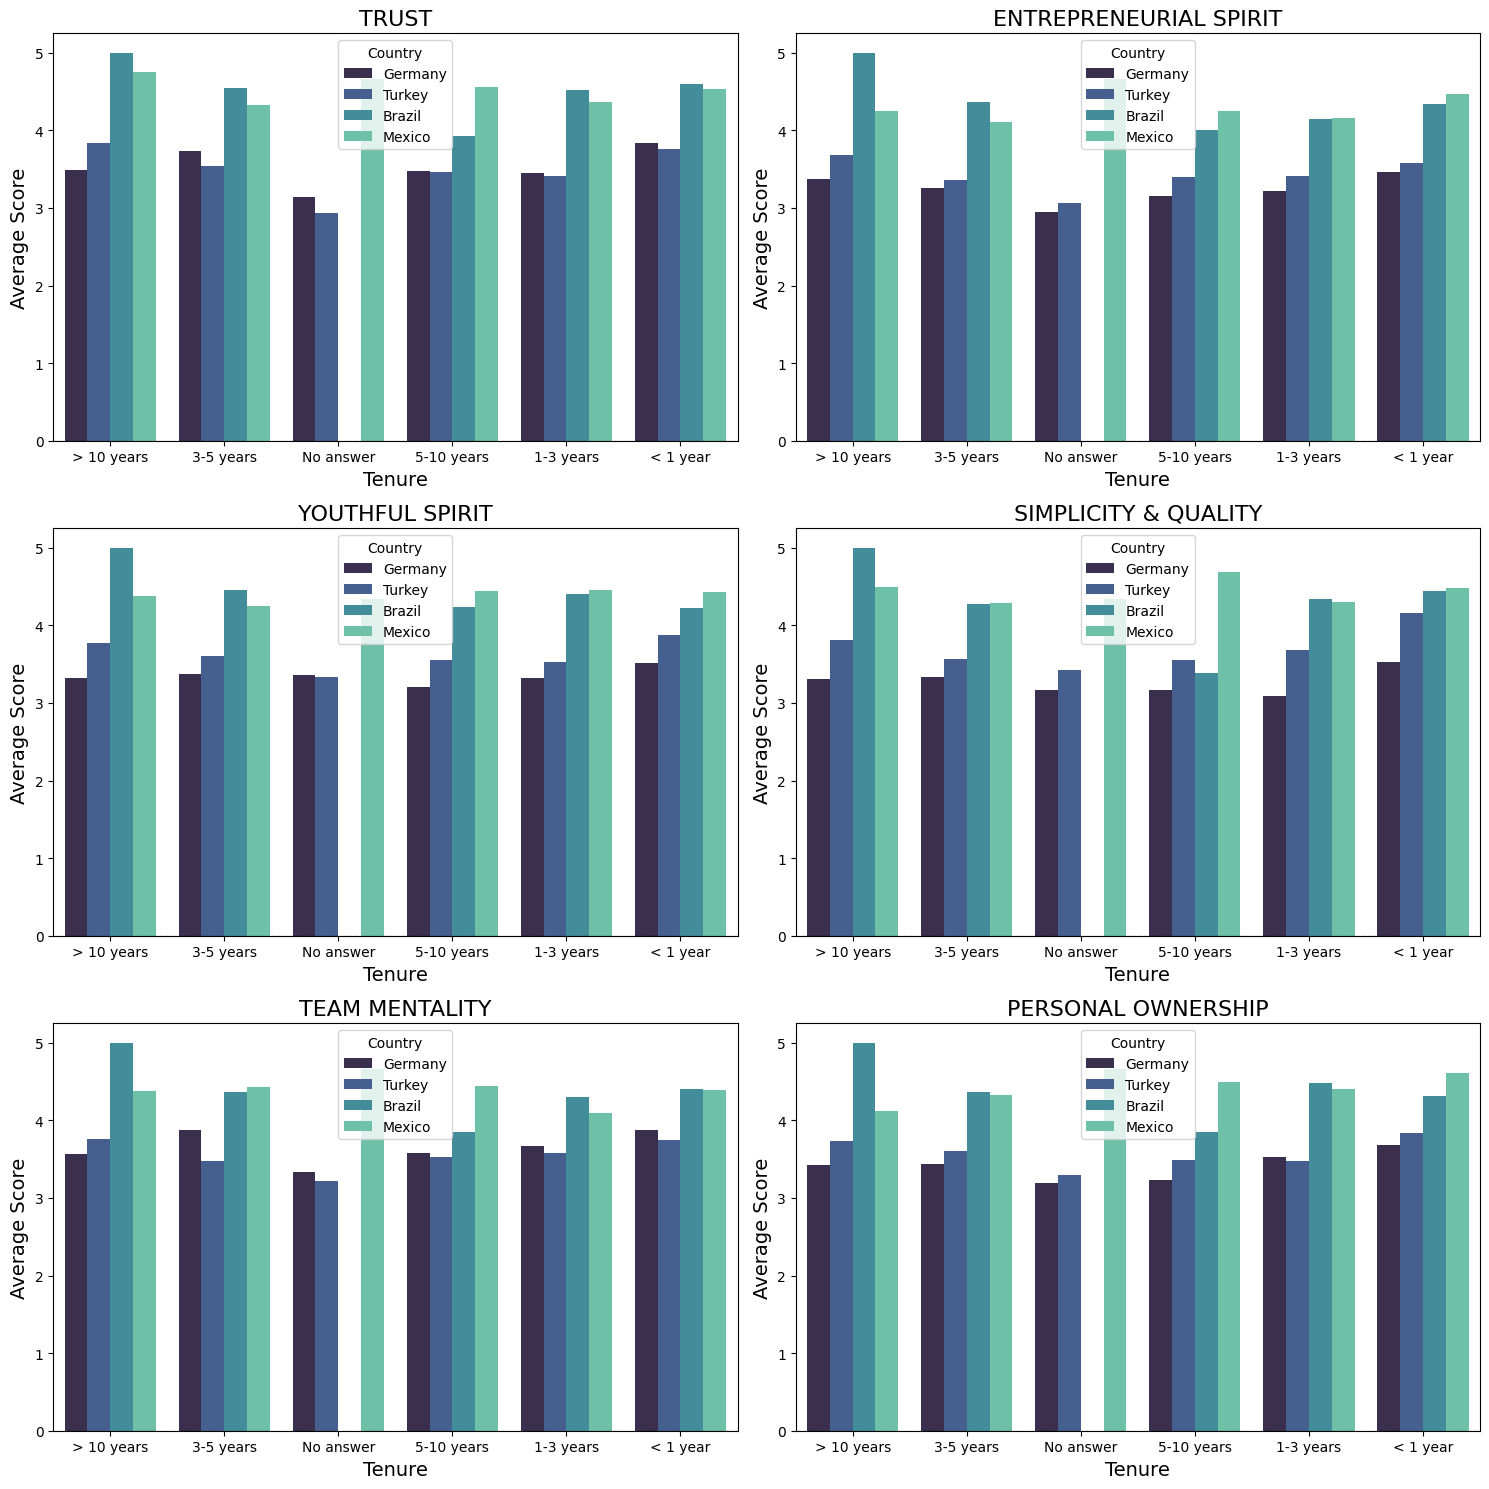

In [13]:
get_analysis('Tenure')

In [14]:
grouped_data = df.groupby(["Country", "Age"])[qualities_columns].mean()
print(grouped_data)

                            TRUST  ENTREPRENEURIAL SPIRIT  YOUTHFUL SPIRIT  \
Country       Age                                                            
Brazil        27 - 34    4.531250                4.312500         4.468750   
              35 - 42    4.392857                4.178571         4.035714   
              43 - 50    4.500000                4.500000         4.375000   
              51 - 58    4.666667                4.666667         4.666667   
              ≤ 26       4.384615                3.923077         4.461538   
...                           ...                     ...              ...   
United States 43 - 50    3.437500                3.125000         2.875000   
              51 - 58    3.777778                3.944444         3.611111   
              No answer  3.250000                3.500000         3.000000   
              ≤ 26       3.384615                3.538462         3.923077   
              ≥ 59       3.500000                4.000000       

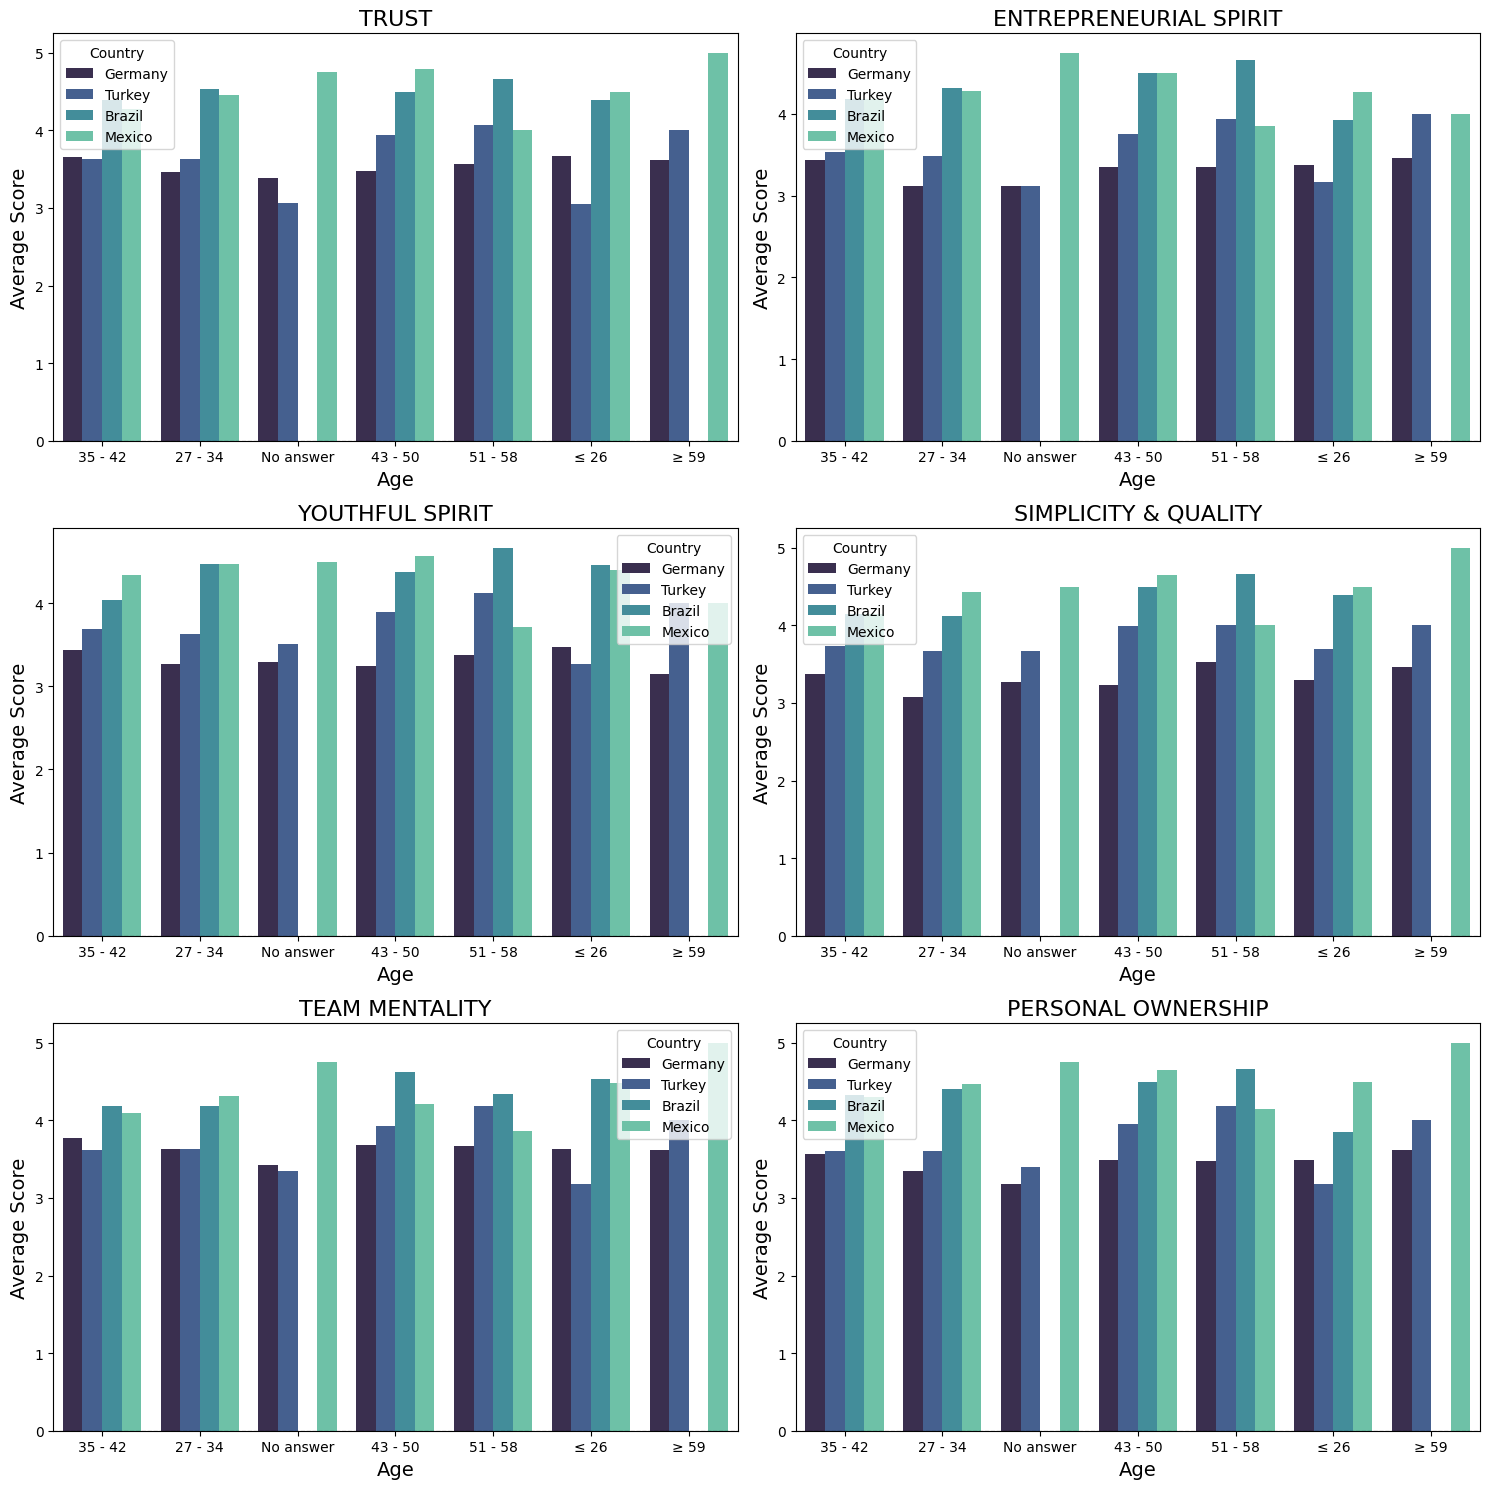

In [15]:
get_analysis("Age")

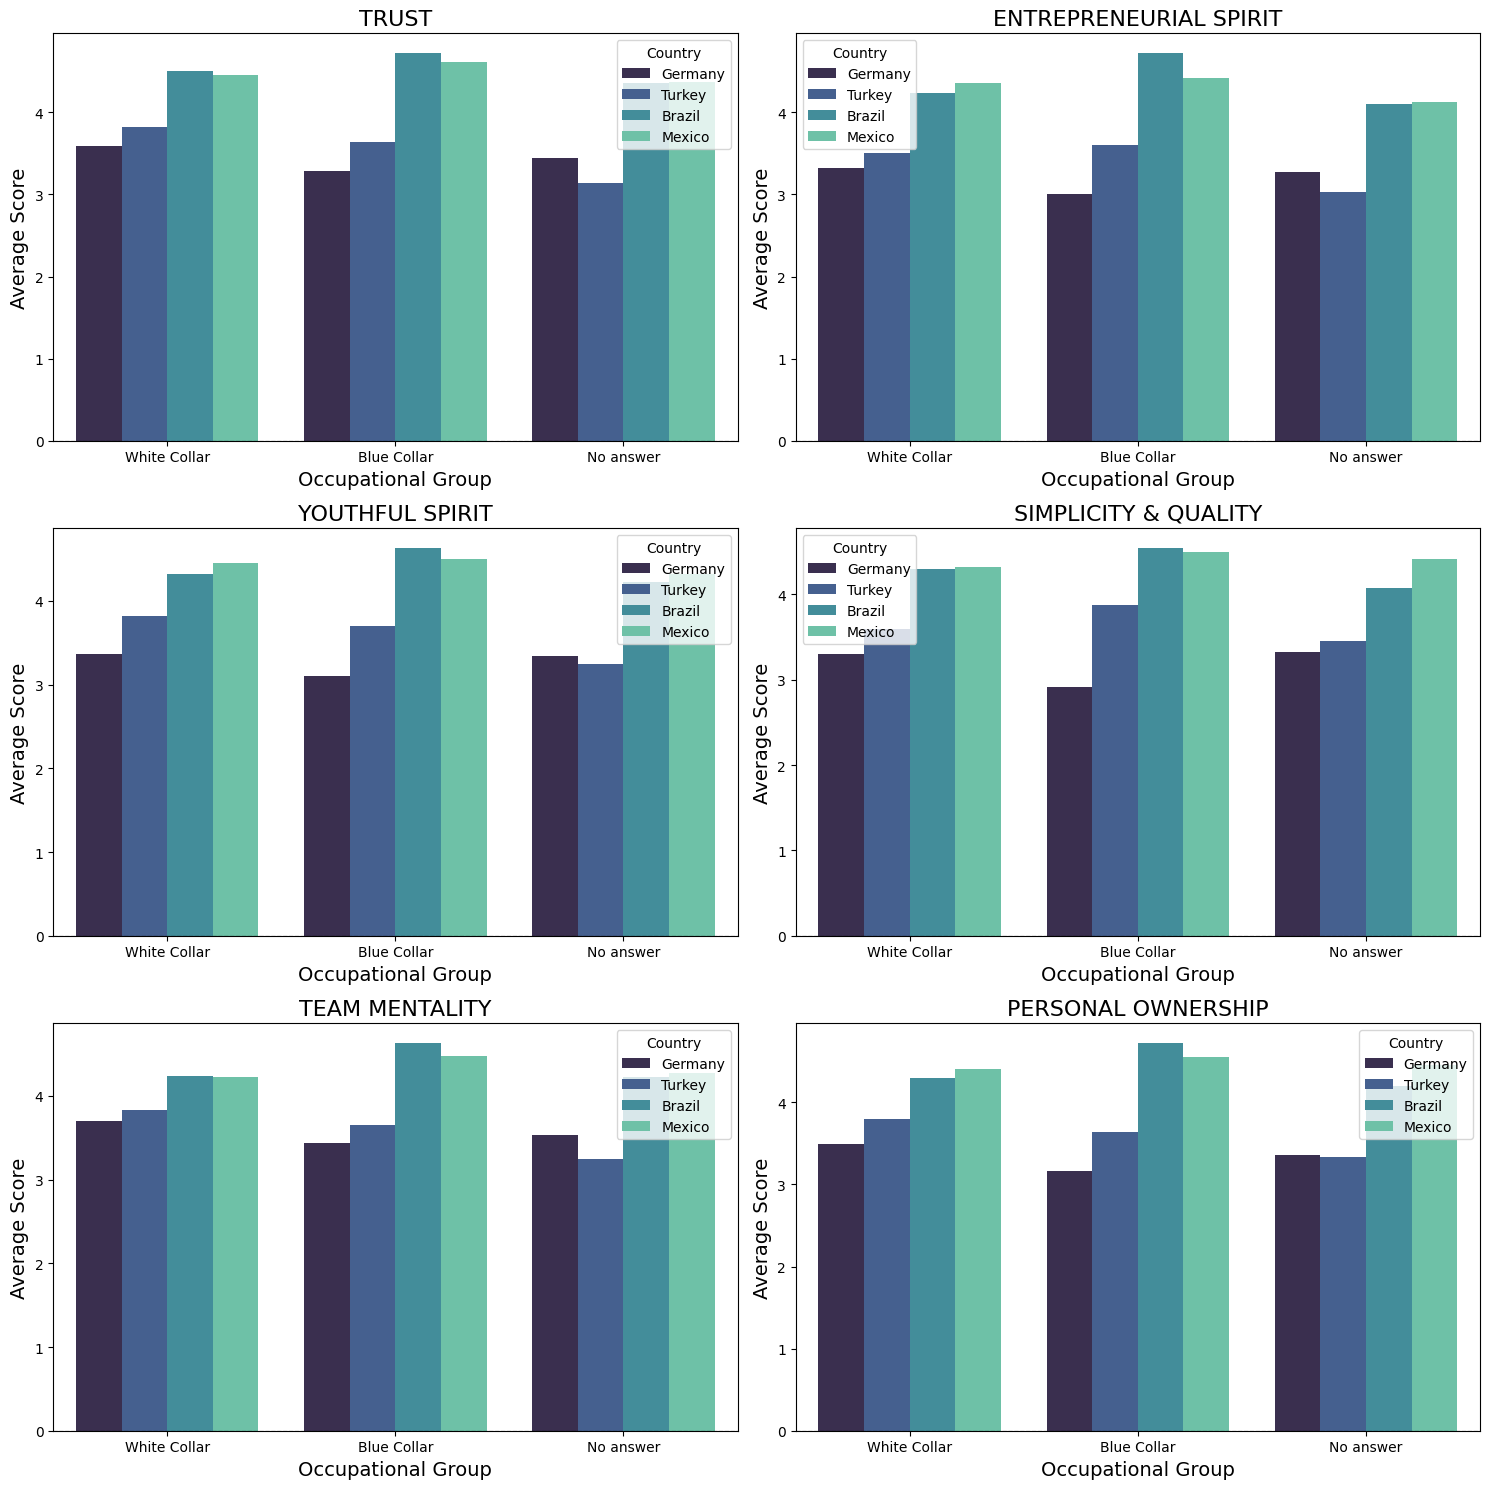

In [16]:
get_analysis("Occupational Group")